In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow-federated

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install nest-asyncio
!pip install pandas
!pip install matplotlib

In [1]:
import collections
import os
import pandas as pd
import tensorflow as tf
import tensorflow_federated as tff
import time
from matplotlib import pyplot as plt
import nest_asyncio
import numpy as np
nest_asyncio.apply()

%matplotlib inline

2024-02-21 08:23:10.974984: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 08:23:13.649604: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 08:23:13.649658: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 08:23:13.654189: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 08:23:14.858220: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 08:23:14.859971: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
df_train = pd.read_csv('/workspaces/Network_Intrusion_Detection/KDDTrain+.txt')  # Replace with the actual path
df_test = pd.read_csv('/workspaces/Network_Intrusion_Detection/KDDTest+.txt')    # Replace with the actual path


In [3]:
df_train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

df_test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']

In [4]:
df_train = df_train.drop('difficulty_level', 1)
df_test = df_test.drop('difficulty_level', 1)
df_train = df_train.drop('protocol_type', 1)
df_test = df_test.drop('protocol_type', 1)
df_train = df_train.drop('service', 1)
df_test = df_test.drop('service', 1)
df_train = df_train.drop('flag', 1)
df_test = df_test.drop('flag', 1)

/tmp/ipykernel_3230/1202639473.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop('difficulty_level', 1)
/tmp/ipykernel_3230/1202639473.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('difficulty_level', 1)
/tmp/ipykernel_3230/1202639473.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = df_train.drop('protocol_type', 1)
/tmp/ipykernel_3230/1202639473.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('protocol_type', 1)
/tmp/ipykernel_3230/1202639473.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argum

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   src_bytes                    125972 non-null  int64  
 2   dst_bytes                    125972 non-null  int64  
 3   land                         125972 non-null  int64  
 4   wrong_fragment               125972 non-null  int64  
 5   urgent                       125972 non-null  int64  
 6   hot                          125972 non-null  int64  
 7   num_failed_logins            125972 non-null  int64  
 8   logged_in                    125972 non-null  int64  
 9   num_compromised              125972 non-null  int64  
 10  root_shell                   125972 non-null  int64  
 11  su_attempted                 125972 non-null  int64  
 12  num_root                     125972 non-null  int64  
 13 

In [6]:
df_train['subclass'] = df_train['subclass'].str.lower()
df_test['subclass'] = df_test['subclass'].str.lower()

In [7]:
tmp = df_train.pop('subclass')

In [8]:
classlist = []
check1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
check2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
check3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
check4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

DoSCount=0
ProbeCount=0
U2RCount=0
R2LCount=0
NormalCount=0

for item in tmp:
    if item in check1:
        classlist.append("DoS")
        DoSCount=DoSCount+1
    elif item in check2:
        classlist.append("Probe")
        ProbeCount=ProbeCount+1
    elif item in check3:
        classlist.append("U2R")
        U2RCount=U2RCount+1
    elif item in check4:
        classlist.append("R2L")
        R2LCount=R2LCount+1
    else:
        classlist.append("Normal")
        NormalCount=NormalCount+1

In [9]:
df_train["subclass"] =classlist

In [10]:
unique_labels = list(df_train.subclass.astype('category').unique())
unique_codes = list(df_train.subclass.astype('category').cat.codes.unique())
mapping = {unique_codes[i] : unique_labels[i] for i in range(len(unique_labels))}

In [11]:
mapping


{1: 'Normal', 0: 'DoS', 3: 'R2L', 2: 'Probe', 4: 'U2R'}

In [12]:
df_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass
0,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
1,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
2,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
3,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal
4,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS
125968,8,105,145,0,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,Normal
125969,0,2231,384,0,0,0,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,Normal
125970,0,0,0,0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS


In [13]:
df_train['subclass'] = df_train['subclass'].replace(unique_labels, unique_codes)
df_test['subclass'] = df_test['subclass'].replace(unique_labels, unique_codes)

In [14]:
train = df_train
test = df_test

In [15]:
n_workers=5
n_samples = int(df_train.shape[0] / n_workers)
assert n_samples > 0, "Each worker must be assigned at least one data point"

In [16]:
import numpy as np
n_epochs = 10
shuffle_buffer_size = df_train.shape[0]
batch_size = 250
prefetch_buffer_size = 50
input_shape = df_train.shape[1]-1
print(input_shape)
output_shape = len(unique_codes)

38


In [17]:
def preprocess(dataframe):

    """Flatten a batch `pixels` and return the features as an `OrderedDict`."""
    def map_fn(dataset):
        return collections.OrderedDict(
            x=tf.cast(dataset[:,:-1], tf.float64),
            y=tf.cast(tf.reshape(dataset[:,-1], shape=(-1, 1)), tf.int64)
        )

    return tf.data.Dataset.from_tensor_slices(dataframe).repeat(n_epochs).shuffle(
        shuffle_buffer_size).batch(batch_size).map(map_fn).prefetch(prefetch_buffer_size)


client_data = [preprocess(train.sample(n=n_samples)) for _ in range(n_workers)]

In [18]:
client_data

[<_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>,
 <_PrefetchDataset element_spec=OrderedDict([('x', TensorSpec(shape=(None, 38), dtype=tf.float64, name=None)), ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])>]

In [19]:
for i in range(n_workers):
    print(f"Worker {i+1} data contains {len(client_data[i])} training points")

Worker 1 data contains 1008 training points
Worker 2 data contains 1008 training points
Worker 3 data contains 1008 training points
Worker 4 data contains 1008 training points
Worker 5 data contains 1008 training points


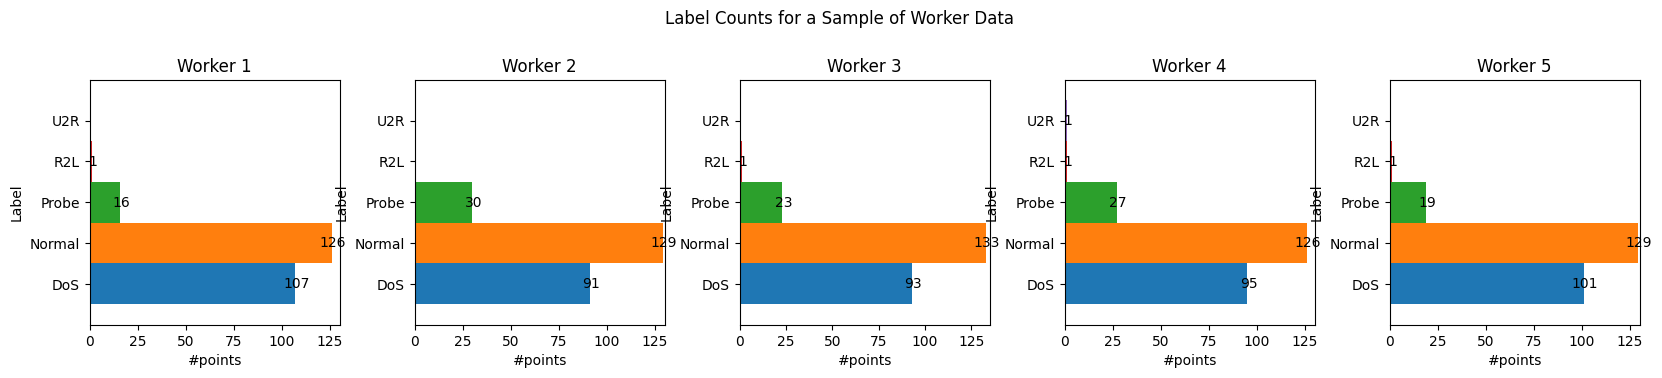

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 7))
fig.suptitle('Label Counts for a Sample of Worker Data')
fig.tight_layout()

for i in range(n_workers):
    m = 0
    plot_data = collections.defaultdict(list)
    for label in list(client_data[i])[0]['y'].numpy()[:,0]:
        # Append counts individually per label to make plots
        # more colorful instead of one color per plot.
        plot_data[label].append(label)
        m = max(m, len(plot_data[label]))

    n_cols = n_workers if n_workers < 5 else 5
    xlim = [0, m+(5-m%5)]
    ylim = [min(unique_codes)-1, max(unique_codes)+1]
    yticks = list(range(min(unique_codes), max(unique_codes)+1))
    yticks_labels = [mapping[k] for k in range(0, max(unique_codes)+1)]

    plt.subplot(int(n_workers / 5)+1, n_cols, i+1)
    plt.subplots_adjust(wspace=0.3)
    plt.title('Worker {}'.format(i+1))
    plt.xlabel('#points')
    plt.xlim(xlim)
    plt.ylabel('Label')
    plt.ylim(ylim)
    plt.yticks(yticks, labels=yticks_labels)

    # plot values on top of bars
    for key in plot_data:
        if len(plot_data[key]) > 0:
            plt.text(len(plot_data[key])+0.6, int(key)-0.1, str(len(plot_data[key])), ha='center')

    for j in range(min(unique_codes),max(unique_codes)+1):
        plt.hist(
            plot_data[j],
            density=False,
            bins=[k-0.5 for k in range(min(unique_codes),max(unique_codes)+2)],
            orientation='horizontal'
        )

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from keras.layers import Dense
from keras.optimizers import Adam

In [31]:
def model_fn():
    input_layer = tf.keras.layers.Input(shape=(input_shape,))
    x = tf.keras.layers.Reshape((1, input_shape))(input_layer)
    x = tf.keras.layers.LSTM(units=128, return_sequences=True)(x)
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True))(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    output_layer = tf.keras.layers.Dense(output_shape, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    return tff.learning.models.from_keras_model(
        model,
        input_spec=collections.OrderedDict(
            x=tf.TensorSpec(shape=[None, input_shape], dtype=tf.float64),
            y=tf.TensorSpec(shape=[None, 1], dtype=tf.int64)),

        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )

In [32]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=0.01),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
)

In [33]:
print(trainer.initialize.type_signature.formatted_representation())

( -> <
  global_model_weights=<
    trainable=<
      float32[38,512],
      float32[128,512],
      float32[512],
      float32[128,256],
      float32[64,256],
      float32[256],
      float32[128,256],
      float32[64,256],
      float32[256],
      float32[128,128],
      float32[128],
      float32[128,5],
      float32[5]
    >,
    non_trainable=<>
  >,
  distributor=<>,
  client_work=<>,
  aggregator=<
    value_sum_process=<>,
    weight_sum_process=<>
  >,
  finalizer=<
    int64,
    float32[38,512],
    float32[128,512],
    float32[512],
    float32[128,256],
    float32[64,256],
    float32[256],
    float32[128,256],
    float32[64,256],
    float32[256],
    float32[128,128],
    float32[128],
    float32[128,5],
    float32[5]
  >
>@SERVER)


In [34]:
def evaluate(num_rounds=10):
    state = trainer.initialize()
    for round in range(num_rounds):
        t1 = time.time()
        result = trainer.next(state, client_data)
        state = result.state
        train_metrics = result.metrics['client_work']['train']

        # Assuming 'SparseCategoricalAccuracy' metric is used
        train_accuracy = train_metrics['sparse_categorical_accuracy'] * 100

        t2 = time.time()
        print('Round {}: accuracy {}, round time {}'.format(
            round+1, train_accuracy, t2 - t1))


In [35]:
evaluate(n_epochs)

2024-02-21 08:44:05.793260: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-21 08:44:05.793384: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-21 08:44:06.079670: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-21 08:44:06.079768: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-21 08:44:10.337247: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-21 08:44:10.337412: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-02-21 08:44:10.703687: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-02-21 08:44:10.703799: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


Round 1: accuracy 82.97856450080872, round time 48.494300842285156
Round 2: accuracy 87.85043954849243, round time 47.021886348724365
Round 3: accuracy 88.26315999031067, round time 45.86816382408142
Round 4: accuracy 88.34476470947266, round time 46.32386016845703
Round 5: accuracy 88.37437629699707, round time 45.93299412727356
Round 6: accuracy 88.38977813720703, round time 45.14415645599365
Round 7: accuracy 88.40557336807251, round time 44.714067697525024
Round 8: accuracy 89.91553783416748, round time 45.90331220626831
Round 9: accuracy 90.63951969146729, round time 45.55994915962219
Round 10: accuracy 91.86242818832397, round time 44.85383081436157
